In [3]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('/home/lab17/jupyter_home/Data/product_image/Training/image/35102_삼양사)건포도150G/35102_30_s_6.jpg'))
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

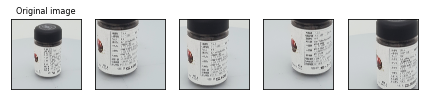

In [37]:
cropper = T.RandomCrop(2000)
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

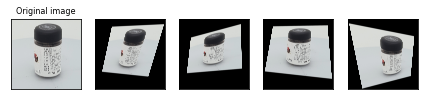

In [6]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

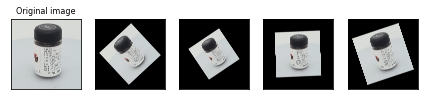

In [12]:
# affine_transfomer = T.RandomAffine(degrees=(-45, 45), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_transfomer = T.RandomAffine(degrees=(-45, 45), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

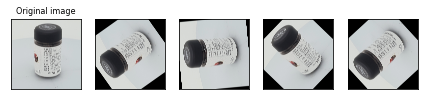

In [15]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

- 360 도 까지 돌려도 될 것 같음

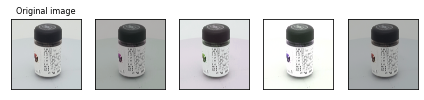

In [43]:
jitter = T.ColorJitter(brightness=.7, hue=.4)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

In [ ]:
train_transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize((256, 256)),
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                    transforms.RandomCrop(230),
                    transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
                    transforms.RandomAffine(degrees=(-45, 45), scale=(0.5, 0.75)),
                    transforms.RandomRotation(degrees=(0, 180)),
                    transforms.ColorJitter(brightness=.7, hue=.4),
                    ])